# Higgs hunting - an example of scientific research

This notebook serves as an example of how many areas of science work by taking a look at how the [Higgs boson](https://en.wikipedia.org/wiki/Higgs_boson) was discovered.

The data we use here are actual, meaningful data from the CMS experiment that confirmed the existence of this elusive particle, which then resulted in a Nobel prize. Instead of hiding somewhere under ready made graphs, it is now yours to explore. The example is based on the original code in [http://opendata.cern.ch/record/5500] on the CERN Open Data portal (Jomhari, Nur Zulaiha; Geiser, Achim; Bin Anuar, Afiq Aizuddin; (2017). Higgs-to-four-lepton analysis example using 2011-2012 data. CERN Open Data Portal. DOI:10.7483/OPENDATA.CMS.JKB8.RR42), and worked to a notebook by Tom McCauley (University of Notre Dame) and Peitsa Veteli (Helsinki Institute of Physics). 

The method used is pretty common and useful for many purposes. First we have some theoretical background, then we make measurements and try to see if those measurements contain something that correlates or clashes with our assumptions. Perhaps the results confirm our expectations, bring up new questions to look into, force us to adapt our theories or require entirely new ones to explain them. This cycle then continues time and time again.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Data for later use.

csvs = [pd.read_csv('data/4mu_2011.csv'), pd.read_csv('data/4e_2011.csv'), pd.read_csv('data/2e2mu_2011.csv')]
csvs += [pd.read_csv('data/4mu_2012.csv'), pd.read_csv('data/4e_2012.csv'), pd.read_csv('data/2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

According to the standard model, one of the ways the Higgs boson can decay is by first creating two Z bosons that then decay further into four leptons (electrons, muons...). It isn't the only process with such a final state, of course, so one has to sift through quite a lot of noise to see that happening. The theory doesn't say too much about what the mass of Higgs could be, but some clever assumptions and enlightened guesses can get you pretty far. For an example, four lepton decay is very dominant in some mass regions, which then guides our search.

In [3]:
# Let's set some values here in regards to the region we're looking at.

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

Let's look at some simulations from other processes there. Here are some [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) -simulated values for such events that have already been weighted by luminosity, cross-section and number of events. Basically we create a set of values that have some randomness in them, just like a real measurement would have, but which follows the distribution that has been observed in those processes.

In [4]:
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])


Let's take a look at those numbers and how they contribute to what we'll measure in the accelerator.

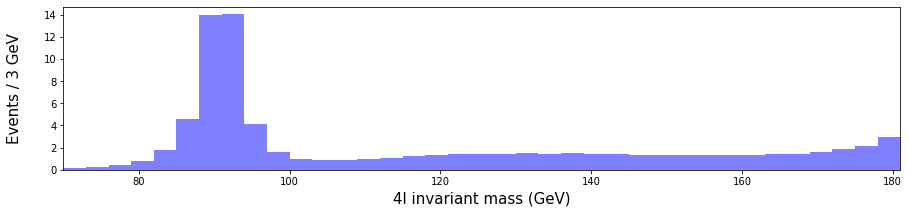

In [5]:
# ZZ, a pair of heavier bosons.

plt.figure(figsize = (15,3))
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

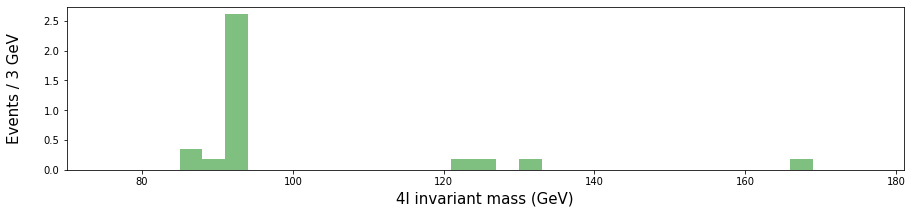

In [6]:
# DY, some irreducible background from singular Z bosons.

plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

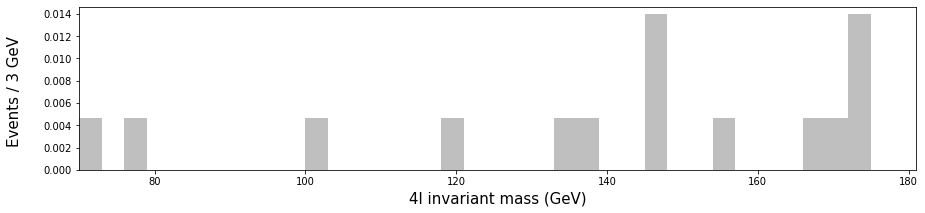

In [7]:
# ttbar, a pair of top and anti-top quarks.

plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV \n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Let's stack them together and see what kind of shape we might expect from the experiment.

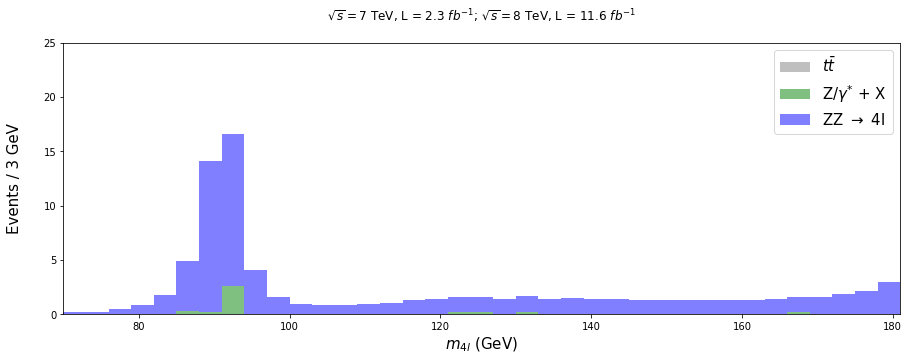

In [8]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

So there ought to be something around 90 GeV or so, which makes sense as most of this comes from Z bosons. Let's add our measured data on top of that. How well do they line up?

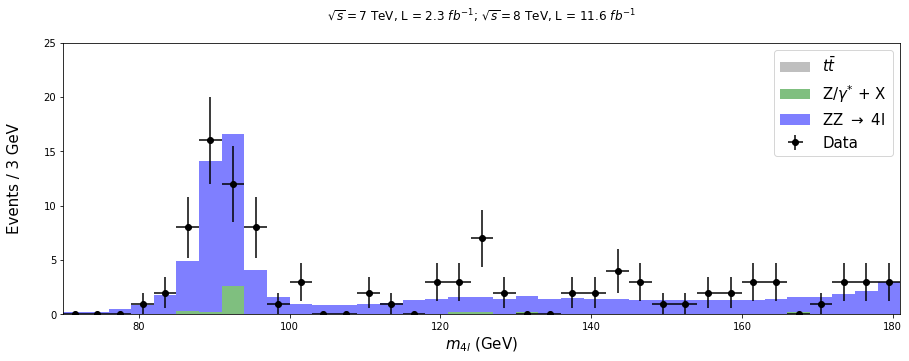

In [9]:
plt.figure(figsize = (15,5))

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

There are clearly some points in there that don't seem to arise from our simulated processes. For comparisons sake the physicists made distribution simulations for Higgs at varying masses, one of which is shown here. This graph shows us what the Higgs boson should look like, if it had a mass of 125 GeV.

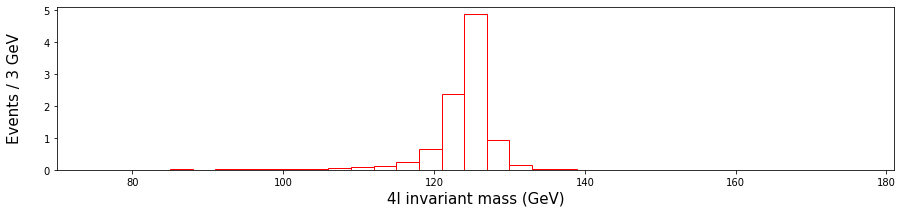

In [10]:
# HZZ, our theoretical assumption of a Higgs via two Z bosons.

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Bonus question: how can something, that seems to have a mass of roughly 125 GeV decay via two Z bosons, with mass over 90 GeV?

Add that in the previous graph and see how it lines up.

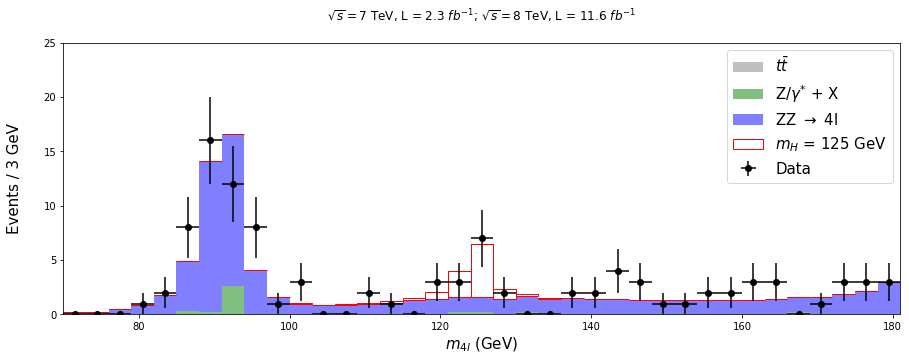

In [11]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# HZZ
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

This sample seems quite small, and by numerical length it is, but it still gives us an enlightening look at how research is done. There aren't very many processes that produce four leptons at the end, so getting even this many comprises about half the data that is publicly available from the 2011-2012 run. More precise information about the data can be found from [here](http://opendata.cern.ch/record/5500).

In [12]:
# If we take a look at the data, we can see the properties of all four leptons involved.

pd.options.display.max_columns = 50
fourlep.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,PID2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,PID3,E3,px3,py3,pz3,pt3,eta3,phi3,Q3,PID4,E4,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,-1,-13,29.0804,-19.31050,-5.31425,21.0837,20.0284,0.918146,-2.873040,1,13,17.3154,-10.87010,-3.64596,12.9753,11.46530,0.971505,-2.81797,-1,-13,11.49390,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,-1,13,72.1018,15.32840,21.35470,-67.1392,26.2866,-1.667150,0.948222,-1,-13,89.7552,10.34670,-20.27240,86.8214,22.76010,2.048740,-1.09888,1,-13,30.21620,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,-1,-13,68.1611,6.93837,22.85760,63.8382,23.8875,1.709440,1.276090,1,-13,19.5056,4.71517,8.50412,16.9087,9.72383,1.320370,1.06454,1,13,24.83870,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,-1,13,88.3199,85.94400,-16.81970,-11.4510,87.5743,-0.130388,-0.193263,-1,-13,45.0987,-19.98280,-29.14080,-28.0247,35.33410,-0.727298,-2.17188,1,-13,9.79377,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,1,13,39.8417,31.53530,18.85330,15.4088,36.7413,0.407975,0.538835,-1,-13,20.3208,3.30081,16.01250,12.0677,16.34910,0.683619,1.36750,1,13,6.83735,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900


As we can see, there is certainly some activity going on in the 125 GeV region. This data set is too small to say anything for certain, but it isn't too far off from actual analysis results. The most telling differences mainly rise from our somewhat rough methods compared to the more sophisticated ones used at CMS.
<img src = 'https://inspirehep.net/record/1124338/files/H4l_mass_v3.png' align = 'right'>
